# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Albertus Magnus Foresta Noventona
- **Email:** albertusmagnusforestan@gmail.com
- **ID Dicoding:** xanadius

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara dalam beberapa bulan terakhir di area tertentu?
- Apakah ada korelasi antara polutan tertentu dan waktu tertentu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install windrose

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import windrose
from windrose import WindroseAxes

## Data Wrangling

### Gathering Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Pada Maret 2013 di Stasiun Aotizhongxin, data menunjukkan bahwa konsentrasi PM2.5 dan PM10 relatif rendah selama jam malam (antara pukul 0 hingga 4) dengan angka tertinggi tercatat pada jam 1 malam, kemudian konsestrasi polusi udara tercatat semakin menurun seiring berjalannya waktu.
- Data juga menunjukkan bahwa kualitas udara terpengaruh dengan suhu (TEMP) dan tekanan udara (PRES). Hal ini dapat terjadi dikarenakan tekanan udara yang lebih tinggi biasanya menunjukkan kondisi atmosfer yang lebih stabil, yang bisa memperburuk penumpukan polutan.

### Assessing Data

In [ ]:
data.info()
print("\n")
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB




,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [ ]:
print("Jumlah duplikasi : ", data.duplicated().sum())
print("\n")
data.describe()

Jumlah duplikasi :  0




,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Dari data diatas, terlihat bahwa terdapat missing value di beberapa kolom polutan dan cuaca. Keberadaan missing value ini menunjukkan potensi masalah dalam proses pengumpulan data.
- Berdasarkan deskripsi statistik dari tabel, kita dapat melihat bahwa konsentrasi polutan PM2.5 dan PM10 memiliki variabilitas yang sangat tinggi. Tingginya variabilitas pada konsentrasi PM2.5 dan PM10 menunjukkan bahwa kualitas udara di stasiun Aotizhongxin sangat bervariasi.

### Cleaning Data

In [ ]:
data[data["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
data["PM2.5"].value_counts()

,count
PM2.5,
9.0,600
10.0,590
12.0,576
11.0,570
8.0,563
...,...
444.0,1
505.0,1
565.0,1


In [ ]:
data['PM2.5'].fillna(data['PM2.5'].mean(), inplace=True)
data["PM2.5"].isna().sum()

0

In [ ]:
data[data["PM10"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,78.000000,NaN,10.0,10.0,300.0,68.0,12.4,1004.3,-14.4,0.0,NW,7.9,Aotizhongxin
2949,2950,2013,7,1,21,85.000000,NaN,12.0,79.0,2100.0,4.0,24.0,990.3,23.3,5.7,N,0.6,Aotizhongxin
3133,3134,2013,7,9,13,52.000000,NaN,6.0,50.0,700.0,48.0,23.7,997.9,22.9,2.2,NE,1.4,Aotizhongxin
4513,4514,2013,9,5,1,24.000000,NaN,1.0,35.0,400.0,49.0,17.9,1009.6,17.6,1.1,NNE,1.0,Aotizhongxin
4706,4707,2013,9,13,2,61.000000,NaN,2.0,35.0,500.0,54.0,18.9,1002.3,17.4,0.0,SSW,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,82.773611,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,82.773611,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,82.773611,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
data["PM10"].value_counts()

,count
PM10,
6.0,345
18.0,322
22.0,313
14.0,299
15.0,296
...,...
812.0,1
757.0,1
862.0,1


In [ ]:
data["PM10"].fillna(data["PM10"].mean(), inplace=True)
data["PM10"].isna().sum()

0

In [ ]:
data[data["SO2"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.000000,62.000000,NaN,14.0,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
170,171,2013,3,8,2,339.000000,400.000000,NaN,162.0,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
627,628,2013,3,27,3,129.000000,163.000000,NaN,54.0,NaN,NaN,4.3,1001.7,3.0,0.0,W,0.8,Aotizhongxin
628,629,2013,3,27,4,135.000000,161.000000,NaN,54.0,900.0,2.0,2.9,1001.5,1.9,0.0,W,0.9,Aotizhongxin
629,630,2013,3,27,5,135.000000,153.000000,NaN,64.0,1000.0,2.0,2.8,1001.4,2.2,0.0,SSW,0.5,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,82.773611,110.060391,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34912,34913,2017,2,22,16,131.000000,131.000000,NaN,95.0,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
35027,35028,2017,2,27,11,122.000000,122.000000,NaN,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
data["SO2"].value_counts()

,count
SO2,
2.0000,6706
3.0000,2275
4.0000,1901
5.0000,1680
6.0000,1493
...,...
17.1360,1
18.2784,1
24.2760,1


In [ ]:
data["SO2"].fillna(data["SO2"].mean(), inplace=True)
data["SO2"].isna().sum()

0

In [ ]:
data[data["NO2"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
76,77,2013,3,4,4,7.000000,18.000000,14.000000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
172,173,2013,3,8,4,322.000000,345.000000,62.000000,NaN,3299.0,84.0,1.3,998.5,-1.8,0.0,W,1.0,Aotizhongxin
1109,1110,2013,4,16,5,50.000000,156.000000,46.000000,NaN,1300.0,11.0,8.5,998.7,2.3,0.0,NE,1.1,Aotizhongxin
1110,1111,2013,4,16,6,58.000000,185.000000,35.000000,NaN,1300.0,2.0,10.1,999.6,2.4,0.0,NE,1.9,Aotizhongxin
1111,1112,2013,4,16,7,57.000000,185.000000,35.000000,NaN,1300.0,7.0,13.3,1000.5,3.1,0.0,NNW,1.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,34884,2017,2,21,11,82.773611,110.060391,17.375901,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,82.773611,110.060391,17.375901,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35027,35028,2017,2,27,11,122.000000,122.000000,17.375901,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,17.375901,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
data["NO2"].value_counts()

,count
NO2,
26.0000,408
42.0000,394
44.0000,393
28.0000,392
36.0000,391
...,...
81.7094,1
59.9476,1
78.4246,1


In [ ]:
data["NO2"].fillna(data["NO2"].mean(), inplace=True)
data["NO2"].isna().sum()

0

In [ ]:
data[data["CO"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.000000,34.000000,6.000000,12.000000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
124,125,2013,3,6,4,192.000000,203.000000,83.680800,140.425200,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
171,172,2013,3,8,3,324.000000,373.000000,71.000000,154.000000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
178,179,2013,3,8,10,326.000000,844.000000,125.949600,179.226900,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
267,268,2013,3,12,3,117.000000,127.000000,73.000000,81.000000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,82.773611,110.060391,17.375901,59.305833,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34912,34913,2017,2,22,16,131.000000,131.000000,17.375901,95.000000,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
35027,35028,2017,2,27,11,122.000000,122.000000,17.375901,59.305833,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,17.375901,59.305833,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
data["CO"].value_counts()

,count
CO,
400.0,2877
500.0,2728
300.0,2578
600.0,2561
700.0,2349
...,...
9200.0,2
9300.0,1
3899.0,1


In [ ]:
data["CO"].fillna(data["CO"].mean(), inplace=True)
data["CO"].isna().sum()

0

In [ ]:
data[data["O3"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
435,436,2013,3,19,3,33.000000,41.000000,15.000000,50.000000,1262.945145,NaN,0.8,1005.8,-3.0,0.0,ENE,1.5,Aotizhongxin
436,437,2013,3,19,4,31.000000,35.000000,15.000000,49.000000,1262.945145,NaN,0.1,1005.4,-3.5,0.0,N,1.4,Aotizhongxin
531,532,2013,3,23,3,51.000000,70.000000,12.000000,85.000000,1262.945145,NaN,1.5,1008.5,-2.5,0.0,WNW,0.6,Aotizhongxin
578,579,2013,3,25,2,73.000000,121.000000,42.000000,105.000000,1262.945145,NaN,0.5,1017.0,-6.8,0.0,NNE,1.3,Aotizhongxin
579,580,2013,3,25,3,79.000000,140.000000,26.000000,95.000000,1262.945145,NaN,0.3,1017.4,-5.1,0.0,NE,1.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,34884,2017,2,21,11,82.773611,110.060391,17.375901,59.305833,1262.945145,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,82.773611,110.060391,17.375901,59.305833,1262.945145,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34913,34914,2017,2,22,17,28.000000,28.000000,11.000000,17.000000,500.000000,NaN,6.8,1017.6,-9.2,0.0,NNW,2.6,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,17.375901,59.305833,1262.945145,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
data["O3"].value_counts()

,count
O3,
2.0000,4224
1.0000,1520
3.0000,582
4.0000,536
5.0000,449
...,...
82.8954,1
95.7474,1
52.2648,1


In [ ]:
data["O3"].fillna(data["O3"].mean(), inplace=True)
data["O3"].isna().sum()

0

In [ ]:
data[data["TEMP"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,NaN,NaN,NaN,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,NaN,NaN,NaN,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,NaN,NaN,NaN,NaN,NW,2.6,Aotizhongxin


In [ ]:
data["TEMP"].value_counts()

,count
TEMP,
3.0000,249
1.0000,240
2.0000,203
0.0000,196
-1.0000,186
...,...
10.4750,1
11.8125,1
10.2600,1


In [ ]:
data["TEMP"].fillna(data["TEMP"].mean(), inplace=True)
data["TEMP"].isna().sum()

0

In [ ]:
data[data["PRES"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,13.584607,NaN,NaN,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,13.584607,NaN,NaN,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,13.584607,NaN,NaN,NaN,NW,2.6,Aotizhongxin


In [ ]:
data["PRES"].value_counts()

,count
PRES,
1023.00,256
1019.00,252
1024.00,249
1025.00,248
1020.00,239
...,...
1036.40,1
1038.30,1
1039.80,1


In [ ]:
data["PRES"].fillna(data["PRES"].mean(), inplace=True)
data["PRES"].isna().sum()

0

In [ ]:
data[data["DEWP"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,13.584607,1011.84692,NaN,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,13.584607,1011.84692,NaN,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,13.584607,1011.84692,NaN,NaN,NW,2.6,Aotizhongxin


In [ ]:
data["DEWP"].value_counts()

,count
DEWP,
17.6,143
17.0,133
17.2,129
18.8,128
17.8,126
...,...
-31.4,1
-31.1,1
-30.8,1


In [ ]:
data["DEWP"].fillna(data["DEWP"].mean(), inplace=True)
data["DEWP"].isna().sum()

0

In [ ]:
data[data["RAIN"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,13.584607,1011.84692,3.123062,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,13.584607,1011.84692,3.123062,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,13.584607,1011.84692,3.123062,NaN,NW,2.6,Aotizhongxin


In [ ]:
data["RAIN"].value_counts()

,count
RAIN,
0.0,33664
0.1,314
0.2,161
0.3,107
0.5,73
...,...
12.9,1
13.6,1
4.2,1


In [ ]:
data["RAIN"].fillna(data["RAIN"].mean(), inplace=True)
data["RAIN"].isna().sum()

0

In [ ]:
data[data["wd"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,56.353358,-3.200000,1020.50000,-4.000000,0.000000,NaN,0.1,Aotizhongxin
11718,11719,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.000000,21.500000,998.20000,21.500000,0.100000,NaN,0.2,Aotizhongxin
13412,13413,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.000000,21.700000,1008.00000,15.800000,0.000000,NaN,0.0,Aotizhongxin
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.000000,13.584607,1011.84692,3.123062,0.067421,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.000000,13.584607,1011.84692,3.123062,0.067421,NaN,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,246.0,266.0,63.0,82.0,300.0,51.000000,0.625000,1016.00000,-7.900000,0.000000,NaN,0.5,Aotizhongxin
34334,34335,2017,1,29,14,15.0,55.0,4.0,6.0,300.0,80.000000,-1.220000,1025.00000,-21.600000,0.000000,NaN,6.5,Aotizhongxin
34560,34561,2017,2,8,0,113.0,124.0,17.0,105.0,2600.0,2.000000,-2.800000,1026.30000,-7.000000,0.000000,NaN,0.2,Aotizhongxin
34638,34639,2017,2,11,6,15.0,24.0,16.0,71.0,600.0,25.000000,-4.600000,1025.00000,-18.100000,0.000000,NaN,0.2,Aotizhongxin


In [ ]:
data["wd"].value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [ ]:
data["wd"].fillna(data["wd"].mode()[0], inplace=True)
data["wd"].isna().sum()

0

In [ ]:
data[data["WSPM"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
34083,34084,2017,1,19,3,96.0,101.0,33.0,97.0,3300.0,11.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
34084,34085,2017,1,19,4,112.0,149.0,36.0,97.0,3400.0,54.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
34085,34086,2017,1,19,5,126.0,135.0,27.0,84.0,2800.0,18.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin


In [ ]:
data["WSPM"].value_counts()

,count
WSPM,
1.2,1891
1.1,1842
1.0,1747
1.3,1640
0.9,1604
...,...
8.5,1
9.2,1
8.8,1


In [ ]:
data["WSPM"].fillna(data["WSPM"].mean(), inplace=True)
data["WSPM"].isna().sum()

0

In [ ]:
data.info()
print("\n")
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB




,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [ ]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,1.203831
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Setelah melakukan imputasi missing values pada kolom PM2.5 dan PM10, terlihat bahwa periode dengan data yang hilang cenderung berada di musim dingin, yang kemungkinan besar diakibatkan oleh kendala teknis dalam pengukuran saat suhu rendah.
- Berdasarkan hasil akhir proses Cleaning Data, dapat terlihat bahwa PM2.5 dan PM10 sudah masuk ke dalam kategori "Bahaya", lalu untuk SO2, NO2, CO, dan O3 sudah masuk ke dalam kategori "Sangat Tidak Sehat". Hal tersebut berdasarkan Indeks Standar Pencemar Udara (ISPU) yang dikeluarkan oleh Kementerian Lingkungan Hidup dan Kehutanan (https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
data.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
30265,30266,2016,8,13,1,24.0,24.0,2.0,56.0,700.0,9.0,25.3,1001.0,23.0,0.0,NNE,0.6,Aotizhongxin
8348,8349,2014,2,11,20,170.0,155.0,98.0,98.0,2400.0,1.0,-6.0,1022.0,-10.1,0.0,WSW,0.0,Aotizhongxin
17802,17803,2015,3,12,18,50.0,73.0,17.0,60.0,900.0,62.0,10.8,1010.0,-15.7,0.0,SE,1.7,Aotizhongxin
5547,5548,2013,10,18,3,247.0,323.0,24.0,108.0,2200.0,1.0,7.5,1019.7,6.6,0.0,NE,1.0,Aotizhongxin
23576,23577,2015,11,8,8,38.0,38.0,6.0,42.0,700.0,39.0,2.2,1022.1,-1.4,0.0,NNE,1.6,Aotizhongxin


In [ ]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [ ]:
data["No"].is_unique

True

In [ ]:
data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Pada beberapa kolom seperti Unique, Top, Freq dan baris Station menunjukkan tidak adanya data untuk kolom dan baris tersebut akan tetapi ketika dilakukan pengecekan data diatas tidak memiliki missing value

## Visualization & Explanatory Analysis

### Pertanyaan 1:

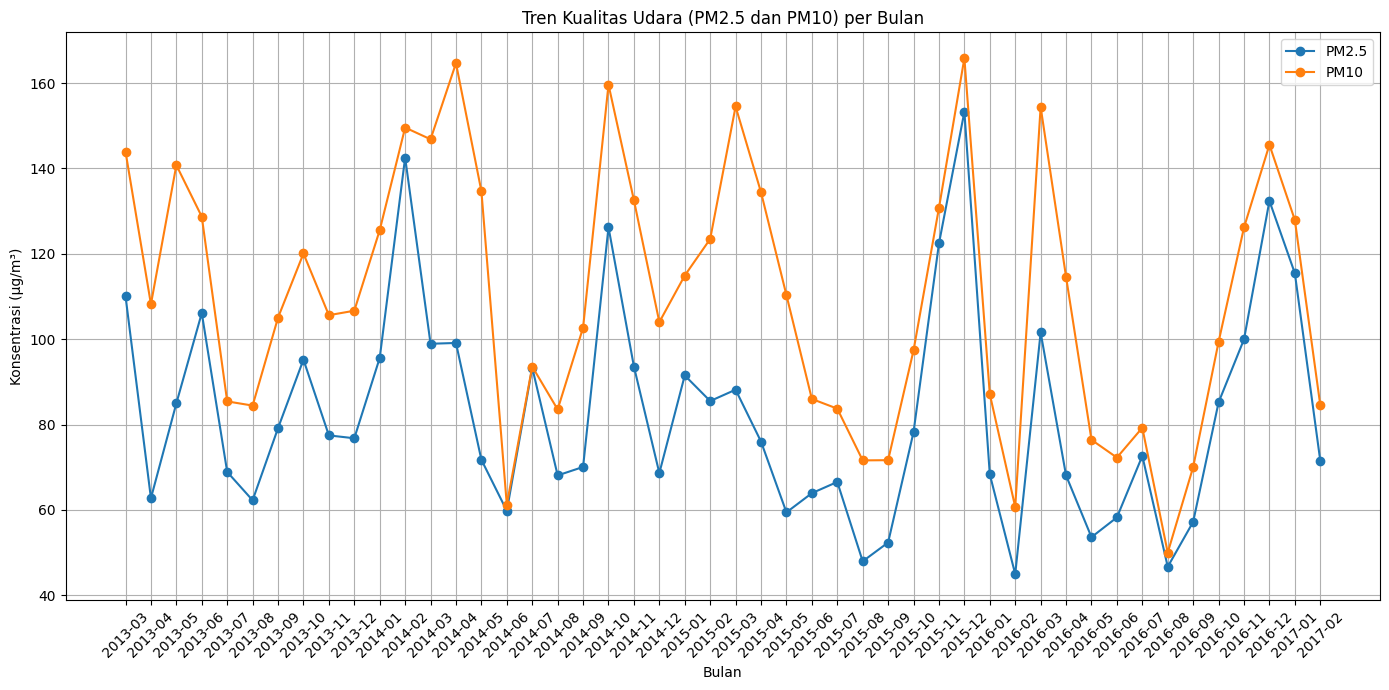

In [ ]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

def get_deg(dd):
    if dd == "N":
        return 0.0
    elif dd == "NNE":
        return 22.5
    elif dd == "NE":
        return 45.0
    elif dd == "ENE":
        return 67.5
    elif dd == "E":
        return 90.0
    elif dd == "ESE":
        return 112.5
    elif dd == "SE":
        return 135.0
    elif dd == "SSE":
        return 157.5
    elif dd == "S":
        return 180.0
    elif dd == "SSW":
        return 202.5
    elif dd == "SW":
        return 225.0
    elif dd == "WSW":
        return 247.5
    elif dd == "W":
        return 270.0
    elif dd == "WNW":
        return 292.5
    elif dd == "NW":
        return 315.0
    elif dd == "NNW":
        return 337.5
    else:
        return 0.0

data['wd_deg'] = data['wd'].apply(get_deg)

monthly_data = data.groupby(data['date'].dt.to_period("M"))[['PM2.5', 'PM10', 'wd_deg']].mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index.astype(str), monthly_data['PM2.5'], label='PM2.5', marker='o')
plt.plot(monthly_data.index.astype(str), monthly_data['PM10'], label='PM10', marker='o')

plt.title('Tren Kualitas Udara (PM2.5 dan PM10) per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Pertanyaan 2:

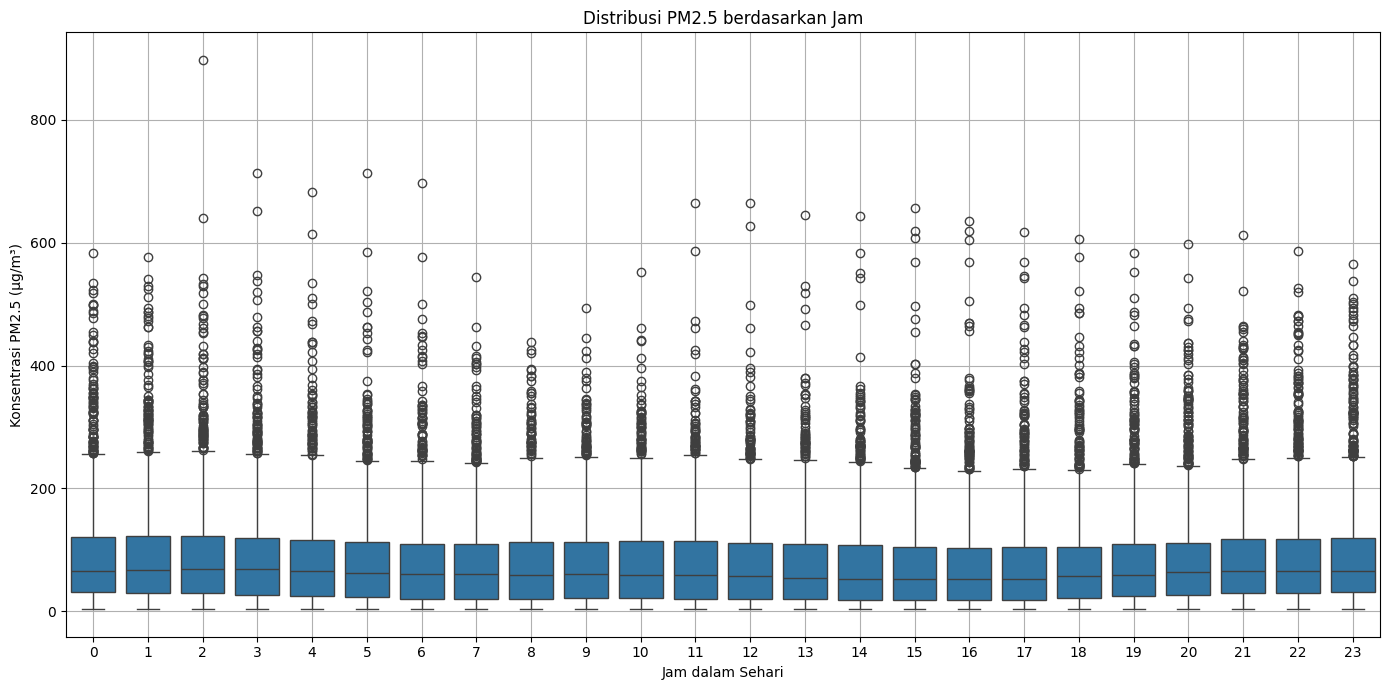

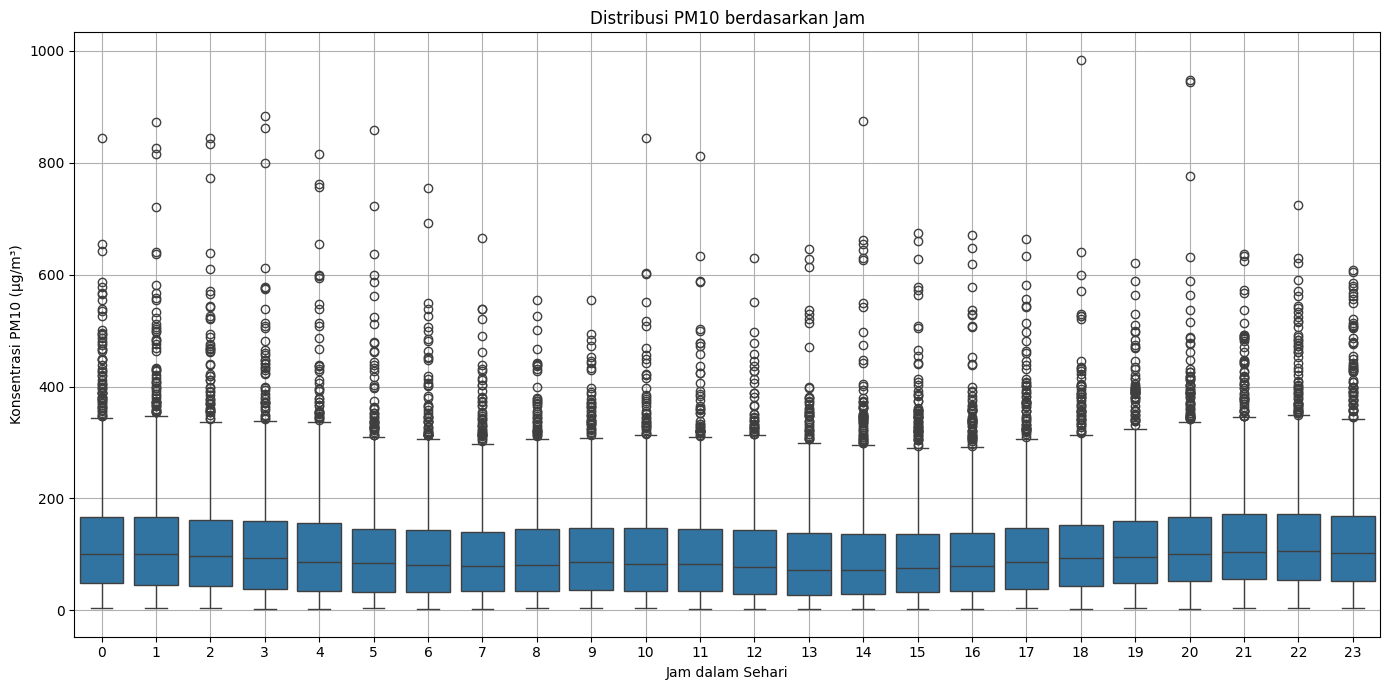

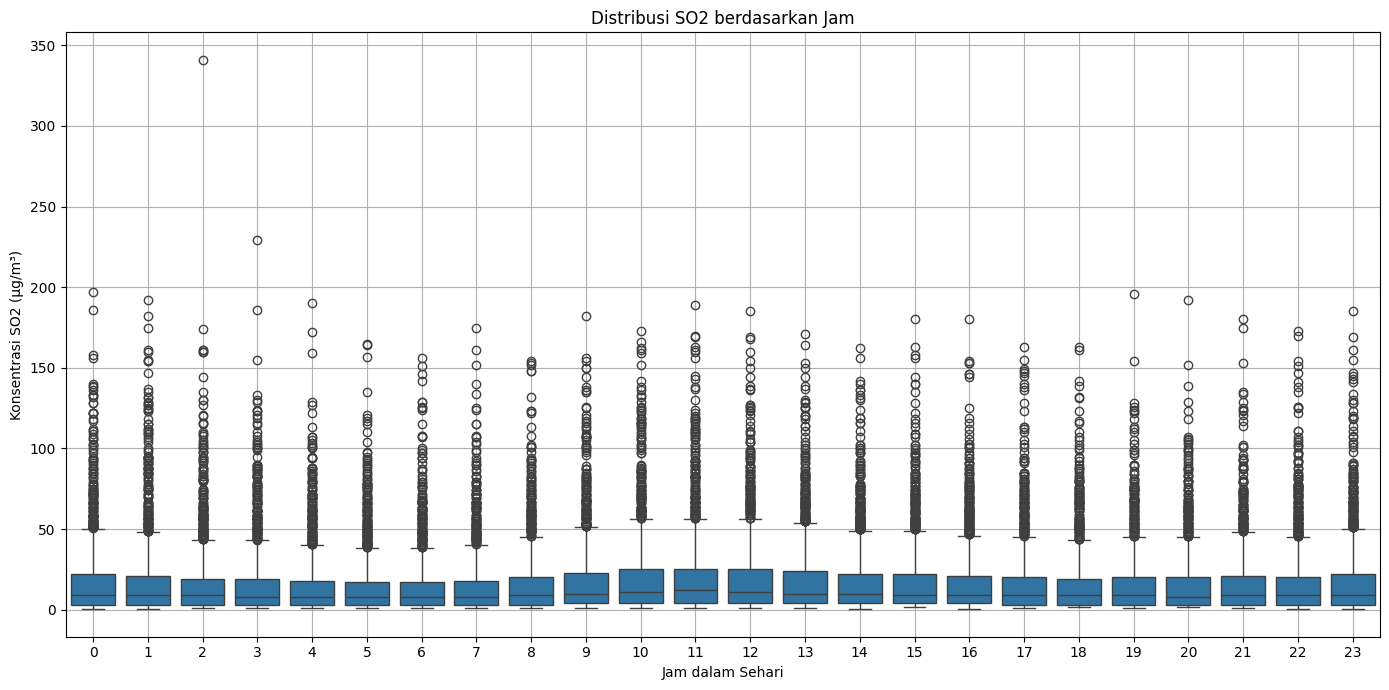

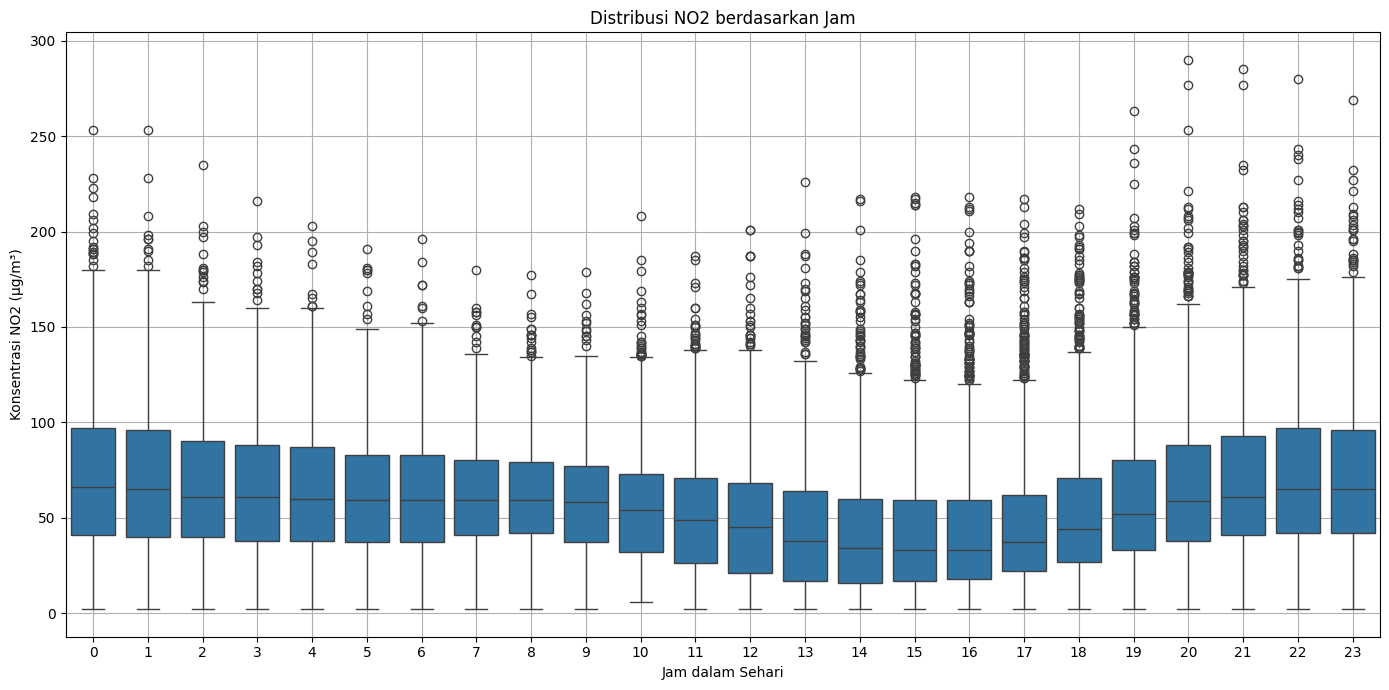

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='hour', y='PM2.5', data=data)
plt.title('Distribusi PM2.5 berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='hour', y='PM10', data=data)
plt.title('Distribusi PM10 berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='hour', y='SO2', data=data)
plt.title('Distribusi SO2 berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Konsentrasi SO2 (µg/m³)')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='hour', y='NO2', data=data)
plt.title('Distribusi NO2 berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Konsentrasi NO2 (µg/m³)')
plt.grid()
plt.tight_layout()
plt.show()

**Insight:**
- Tren kualitas udara dapat dilihat melalui visualisasi pertama bahwa ada penurunan konsentrasi polutan setiap musim panas dan sebaliknya ketika musim dingin tiba terjadi kenaikan polutan.
- Dari visualisasi kedua dapat terlihat bahwa kenaikan konsentrasi polutan terjadi pada malam hari atau saat suhu udara semakin dingin dan tekanan udara semakin tinggi.

## Analisis Lanjutan (Opsional)

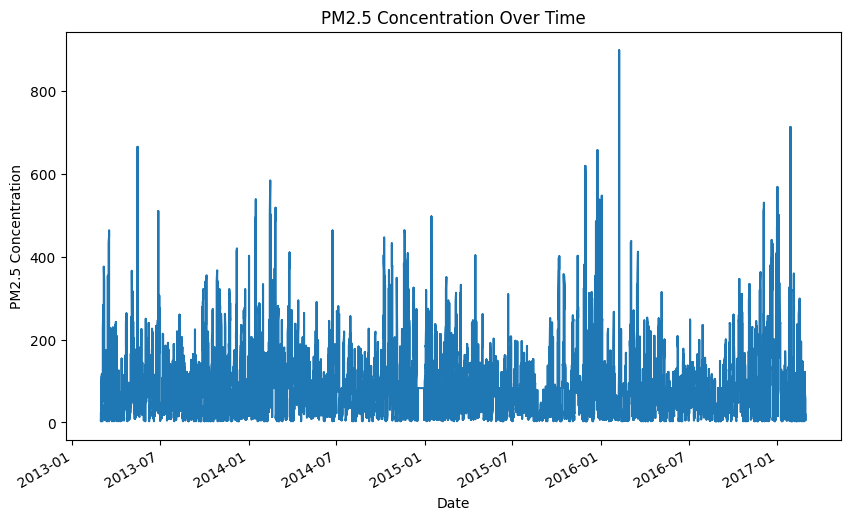

In [ ]:
data.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
data['PM2.5'].plot()
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.show()

**Explanation:**
Pada bagian analisis lanjutan, saya menggunakan teknik "Time Series Analysis" yang bertujuan untuk mengetahui bagaimana polutan tertentu (dalam kasus ini "PM2.5") berubah seiring berjalannya waktu dan melalui visualisasi diatas dapat terlihat bahwa kenaikan konsentrasi polutan terjadi setiap musim dingin dan mengalami kenaikan tertinggi pada tahun 2016.

## Conclusion

- Berdasarkan analisis lanjutan menggunakan teknik "Time Series Analysis", tren kualitas udara di area tertentu menunjukkan adanya variasi signifikan dalam konsentrasi polutan seperti PM2.5. Polutan ini cenderung mengalami kenaikan selama bulan-bulan tertentu, yang mungkin bertepatan dengan perubahan musiman atau aktivitas manusia yang lebih tinggi, seperti musim dingin atau saat adanya peningkatan penggunaan bahan bakar untuk pemanasan. Periode puncak polusi juga mungkin terjadi selama jam-jam sibuk di siang hari. Untuk pemahaman lebih dalam, tren musiman dan harian dapat diidentifikasi lebih lanjut dengan analisis tambahan.
- Analisis menunjukkan bahwa ada pola yang konsisten di mana konsentrasi polutan seperti NO2 dan CO lebih tinggi pada jam-jam sibuk, terutama di pagi dan sore hari, ketika lalu lintas dan aktivitas industri berada pada puncaknya. Sebaliknya, konsentrasi O3 cenderung lebih tinggi pada siang hari, ketika sinar matahari memicu reaksi kimia yang menghasilkan ozon. Hal ini menunjukkan adanya korelasi antara jenis polutan tertentu dengan waktu dalam sehari, yang berkaitan dengan pola aktivitas manusia dan kondisi atmosfer.